# EDA

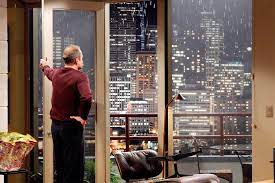

In [151]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv("data/eda.csv")
df.head()

In [3]:
df.shape

(21597, 23)

In [ ]:
df.columns

In [ ]:
df.info()
df.describe()

In [ ]:
#df.columns = df.columns.str.replace("sold_for_sold_for_price","sold_for_price")
df.columns

Check for Duplicates:
Maybe a house was sold several times

In [ ]:
df.id.duplicated().value_counts()

In [ ]:
df.id = df.id.round(0)
df.bedrooms.unique()
df.bedrooms = df.bedrooms.round(0)
df.bathrooms.unique()
df.bathrooms = df.bathrooms.round(2)
df.sqft_living = df.sqft_living.round(0)
df.sqft_above = df.sqft_above.round(0)
df.sqft_basement = df.sqft_basement.round(0)
df.sqft_living15 = df.sqft_living15.round(0)
df.sqft_lot = df.sqft_lot.round(0)
type(df.date_sold)

In [ ]:
#df.columns = df.columns.str.replace("date_sold_sold","date_sold")
#df.columns = df.columns.str.replace("yr","year")
df.columns

In [ ]:
df['date_sold'] = pd.to_datetime(df['date_sold'], format='%Y-%m-%d')
df["date_sold_year"]=df["date_sold"].dt.year
df["date_sold_month"]=df["date_sold"].dt.month
df["date_sold_day"]=df["date_sold"].dt.dayofweek
df.columns

As the id and house_id are the same, let's erase the house_id from the table.

In [ ]:
#df_1 = df.drop("house_id",axis=1,inplace=True)
#Do not run this cell

In [ ]:
df.bedrooms = df.bedrooms.round(0)
df.columns
df.date_sold_year.value_counts()

The following table provides an overview over the housing data set:

| Column          | Description                                                   |
|-----------------|---------------------------------------------------------------|
| id              | Unique identifier for a house                                 |
| date_sold       | Date the house was sold                                       |
| date_sold_year  | Year the house was sold                                       |
| date_sold_month | Month the house was sold                                      |
| date_sold_day   | Day the house was sold (0 = Monday, 1 = Tuesday, etc.)        |
| sold_for_price  | Sale price (prediction target)                                |
| bedrooms        | Number of bedrooms                                            |
| bathrooms       | Number of bathrooms                                           |
| sqft_living     | Square footage of the home                                     |
| sqft_lot        | Square footage of the lot                                      |
| floors          | Total number of floors (levels) in the house                   |
| waterfront      | House with a view to a waterfront                             |
| view            | Whether the house has been viewed                              |
| condition       | Overall condition rating                                      |
| grade           | Overall grade given to the housing unit based on the King County grading system |
| sqft_above      | Square footage of the house apart from the basement            |
| sqft_basement   | Square footage of the basement                                 |
| yr_built        | Year the house was built                                       |
| yr_renovated    | Year when the house was renovated                              |
| zipcode         | Zip code                                                      |
| lat             | Latitude coordinate                                           |
| long            | Longitude coordinate                                          |
| sqft_living15   | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15      | The square footage of the land lots of the nearest 15 neighbors |

## Persona Choice
| Amy Williams, Mafiosi      | Sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI|
|-------------------|-----------------------------------------------------------------------|

### Hypothesis
1. For selling advice, the top 10% of houses are indicated over the price and quality
2. Central houses make up for a big proportion of the top 10% of the houses, but beachfront houses have a share as well
3. Outskirt houses are houses that do not have another house within a certain amount of kilometers or are just at the edge of the town.

### Goals
1. Provide the mafiosi with reasonable selling data about when to sell and buy houses of the top 10%
2. Provide a list of (average to good) outskirt houses to live in, with best buying and selling times (change every 3 months)

Extra: Provide information about hidden gems that yield high returns because of seasonality

In [46]:
df.sold_for_price.sort_values(ascending=False)[:10]
print(df.shape)
df.id.nunique()


(21597, 22)


21420

## Get a feeling for the data set

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['date_sold_month'],color="grey")  # creates histogram for number of sales
ax[0][0].set_ylabel("Houses sold", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,13) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Houses sold per month", fontsize = 15)  # sets title for subplot
ax[0][0].set_xlabel("Month", fontsize = 10);

ax[0][1].hist(x= df['date_sold_day'],color="grey")
ax[0][1].set_ylabel("Houses sold", fontsize = 10)
#ax[0][1].set_xlim(0,7)
ax[0][1].set_title("Houses sold per weekday", fontsize = 15)
ax[0][1].set_xlabel("Weekday", fontsize = 10);

ax[0][2].hist(x=df['sqft_living'], bins=100,color="grey")
ax[0][2].set_ylabel("Count", fontsize = 10)
ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Sizes of houses in dataset", fontsize = 15)
ax[0][2].set_xlabel("Living area [sqft]", fontsize = 10);

ax[1][0].hist(x=df['grade'], bins=10,color="grey")
ax[1][0].set_ylabel("Number of houses per grade", fontsize = 10)
ax[1][0].set_xlim(0,13)
ax[1][0].set_title("Number of houses per grade", fontsize = 15)
ax[1][0].set_xlabel("Grade", fontsize = 10);
                              
ax[1][1].hist(x=df['year_built'], bins=100,color="grey")
ax[1][1].set_ylabel("Count", fontsize = 10)
ax[1][1].set_xlim(1900,2016)
ax[1][1].set_title("Number of houses built [year]", fontsize = 15)
ax[1][1].set_xlabel("Year", fontsize = 10);

ax[1][2].hist(x=df['sold_for_price'],bins=500,color="grey")
ax[1][2].set_ylabel("Count", fontsize = 10)
ax[1][2].set_ylim(0,700)
ax[1][2].set_title("Price distribution of sold houses", fontsize = 15)
ax[1][2].set_xlabel("Price", fontsize = 10);

In [ ]:
fig, ax = plt.subplots()
n_bins = 500  # Anzahl der Bins für das Histogramm

# Plot histogram
counts, bins, _ = ax.hist(x=df['sold_for_price'], bins=n_bins,color="grey")
ax.set_ylabel("Count", fontsize=10)
ax.set_ylim(0, max(counts) + 50)  # Anpassung der y-Achsenbegrenzung für die beste Sichtbarkeit
ax.set_title("Price distribution of sold houses", fontsize=15)
ax.set_xlabel("Price (in million USD)", fontsize=10)

# Calculation tenth decile
tenth_decile = np.percentile(df['sold_for_price'], 90)

# vertical red line for 10th decil
ax.axvline(x=tenth_decile, color='red', linestyle='-', label='Top 10%')

plt.legend()  # Show legend
plt.show()

In [ ]:
df.duplicated(subset="id").count()

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['date_sold_year'])  # creates histogram for number of sales
ax[0][0].set_ylabel("Houses sold", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(1900,2016) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Houses sold each year", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df['view'])
ax[0][1].set_ylabel("Count of view", fontsize = 10)
#ax[0][1].set_xlim(0,7)
ax[0][1].set_title("View of houses sold", fontsize = 15);

ax[0][2].hist(x=df['zipcode'], bins=100)
ax[0][2].set_ylabel("Count", fontsize = 10)
#ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Houses sold per zipcode", fontsize = 15);

ax[1][0].hist(x=df['waterfront'], bins=10)
ax[1][0].set_ylabel("Count", fontsize = 10)
#ax[1][0].set_xlim(0,13)
ax[1][0].set_title("Number of houses with/without waterfront", fontsize = 15);
                              
ax[1][1].hist(x=df['bedrooms'], bins=100)
ax[1][1].set_ylabel("Count", fontsize = 10)
#ax[1][1].set_xlim(1900,2016)
ax[1][1].set_title("Number of bedrooms per house", fontsize = 15);

ax[1][2].hist(x=df['floors'])
ax[1][2].set_ylabel("Count", fontsize = 10)
ax[1][2].set_xlim(0,5)
ax[1][2].set_title("Number of floors per house", fontsize = 15);

In [ ]:
fig = px.scatter_mapbox(df, lat='lat', lon='long', zoom=7.5)
fig.update_layout(mapbox_style="open-street-map")

In [ ]:
df.date_sold_year.describe()

## Analysis about top 10% of houses
Create a slice of these data to work with in the future.
Top 10% of houses are determined via prices, the houses got sold for.

In [ ]:
upper_decile = int(df.sold_for_price.quantile(0.9))
#upper_decile == 887000
df_top_10 = df.query("sold_for_price > 887000")
df_top_10.zipcode.describe()
#df_top_10.info()

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df_top_10['date_sold_month'])  # creates histogram for number of sales
ax[0][0].set_ylabel("Houses sold", fontsize = 10) # sets the label y-axis
#ax[0][0].set_xlim(0,13) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Houses sold per month", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df_top_10['date_sold_day'])
ax[0][1].set_ylabel("Houses sold", fontsize = 10)
#ax[0][1].set_xlim(0,7)
ax[0][1].set_title("Houses sold per weekday", fontsize = 15);

ax[0][2].hist(x=df_top_10['sqft_living'], bins=100)
ax[0][2].set_ylabel("Count", fontsize = 10)
#ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Sizes of houses in top 10 dataset", fontsize = 15);

ax[1][0].hist(x=df_top_10['grade'], bins=10)
ax[1][0].set_ylabel("Number of houses per grade", fontsize = 10)
#ax[1][0].set_xlim(0,13)
ax[1][0].set_title("Number of houses per grade", fontsize = 15);
                              
ax[1][1].hist(x=df_top_10['year_built'], bins=100)
ax[1][1].set_ylabel("Count", fontsize = 10)
ax[1][1].set_xlim(1900,2016)
ax[1][1].set_title("Number of houses built in year", fontsize = 15);

ax[1][2].hist(x=df_top_10['sold_for_price'], bins=200)
ax[1][2].set_ylabel("Count", fontsize = 10)
ax[1][2].set_ylim(0,300)
ax[1][2].set_title("Prices overview", fontsize = 15);

### Get a further impression about important KPIs of the housing market in the top 10 decile

In [ ]:
df_top_10.columns
#df_top_10.date_sold_year.describe()


In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df_top_10['date_sold_year'])  # creates histogram for number of sales
ax[0][0].set_ylabel("Houses sold", fontsize = 10) # sets the label y-axis
#ax[0][0].set_xlim(1900,2016) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Houses sold each year", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df_top_10['view'])
ax[0][1].set_ylabel("Count of view", fontsize = 10)
#ax[0][1].set_xlim(0,7)
ax[0][1].set_title("View of houses sold", fontsize = 15);

ax[0][2].hist(x=df_top_10['zipcode'], bins=100)
ax[0][2].set_ylabel("Count", fontsize = 10)
#ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Houses sold per zipcode", fontsize = 15);

ax[1][0].hist(x=df_top_10['waterfront'], bins=10)
ax[1][0].set_ylabel("Count", fontsize = 10)
#ax[1][0].set_xlim(0,13)
ax[1][0].set_title("Number of houses with/without waterfront", fontsize = 15);
                              
ax[1][1].hist(x=df_top_10['bedrooms'], bins=100)
ax[1][1].set_ylabel("Count", fontsize = 10)
#ax[1][1].set_xlim(1900,2016)
ax[1][1].set_title("Number of bedrooms per house", fontsize = 15);

ax[1][2].hist(x=df_top_10['floors'])
ax[1][2].set_ylabel("Count", fontsize = 10)
ax[1][2].set_xlim(0,5)
ax[1][2].set_title("Number of floors per house", fontsize = 15);

## Location overview of houses sold in a map

In [ ]:
fig = px.scatter_mapbox(df_top_10, lat='lat', lon='long', zoom=8, custom_data=["zipcode","sold_for_price"], hover_name="zipcode",hover_data={"sold_for_price": ":,.0f"})
fig.update_layout(mapbox_style="open-street-map")

Let's take a look at the times when houses were sold.
The grade and view grouped and compared to the prices and months should give an overview, of when the best time is to buy/sell a house.
Maybe, additional KPI's have to be defined.

In [ ]:
df_top_10_zip = df_top_10.zipcode.value_counts().sort_values(ascending=False)[:10]
#As the mafiosi is looking for the prime locations, let's take a look at the 10 most popular zipcodes within this area.
#df_top_10.columns
df_top_10_zip = pd.DataFrame({'zipcode': [98004, 98040, 98006, 98112, 98033, 98199, 98075, 98105, 98053, 98115]})
df_top_10_top = df_top_10[df_top_10['zipcode'].isin(df_top_10_zip['zipcode'])]
df_top_10_top

In [ ]:
# Prices houses got sold for in the top 10 zipcodes:
df_top_10_top.groupby("zipcode").sold_for_price.mean().plot(kind="bar")

#### Location of the houses within the top 10 zipcodes

In [ ]:
fig = px.scatter_mapbox(df_top_10_top, lat='lat', lon='long', zoom=8, custom_data=["zipcode","sold_for_price"], hover_name="zipcode",hover_data={"sold_for_price": ":,.0f"})
fig.update_layout(mapbox_style="open-street-map")

In [ ]:
df_top_10_top[["view","condition","grade","sqft_living","sqft_lot"]].describe()

## Creation of a Grading Coefficient
Let's analyze, whether there are houses that are undervalued within these postcodes. Therefore we need to define a grading system.
This grading system includes the quantitative values for view,condition,grade and sqft_living and sqft_lot to determine the objective value of a house.
As the top 10 postcodes 
Create Coefficient
Preparation: View +1 (to avoid 0 values)

Condition:    (x/5)*0,1
Grade:        (x/13)*0,4
Sqft_living:  (x/13,540)*0,25
Sqft_lot:     (x/453,895)*0,25
AGAINST price: Price per grade should have a value which can then be further analyzed, whether a house is over or below this line to determine overpricing
grading_coefficient = weighted(view,condition,grade,sqft_living,sqft_lot)
This coefficient has to be evaluated against the price each house sells for, to determine which houses are overrated

In [ ]:
df_top_10_top["grading_coefficient"] = (df_top_10_top["condition"]/5)*0.1 + (df_top_10_top["grade"]/13)*0.4 + (df_top_10_top["sqft_living"]/13540)*0.25 + (df_top_10_top["sqft_lot"]/453895)*0.25
df_top_10_top["grading_coefficient"]
#sns.scatterplot(x='grading_coefficient',y="sold_for_price",data=df_top_10_top)
sns.regplot(x='grading_coefficient',y="sold_for_price",data=df_top_10_top,scatter_kws={'s': 25},line_kws={"color": "black"})

#Lineare Regression:
slope, intercept, r_value, p_value, std_err = linregress(df_top_10_top['grading_coefficient'], df_top_10_top['sold_for_price'])
# Die Regressionslinie als Funktion ausgeben
print(f"Regressionslinie: y = {slope:.2f} * x + {intercept:.2f}")

In [ ]:
x_values = np.linspace(0.2, 0.9, 100)
y_values = 5468344.55 * x_values - 999714.37

# Erstelle die Grafik
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='y = 5468344.55 * x - 999714.37', color='red')

# Einstellungen der Achsen
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse (1e6)')
plt.title('Lineare Gleichung: y = 5468344.55 * x - 999714.37')
plt.ylim(0, 7e6)
plt.xlim(0.2, 0.9)

# Zeige die Legende
plt.legend()

# Zeige die Grafik
plt.show()

In [ ]:
sns.scatterplot(x='grading_coefficient', y='sold_for_price', data=df_top_10_top, hue='waterfront', palette={0: 'blue', 1: 'red'}, s=20)
#sns.scatterplot(x='grading_coefficient', y='sold_for_price', data=df_top_10_top, s=20)
sns.regplot(x='grading_coefficient', y='sold_for_price', data=df_top_10_top, scatter=False, ax=plt.gca())
plt.xlabel("Grading Coefficient")
plt.ylabel("Price (in million USD)")

In [ ]:
#Grading only for houses with a waterfront
df_top_waterfront = df_top_10_top.query("waterfront == 1")
df_top_waterfront
sns.regplot(x='grading_coefficient',y="sold_for_price",data=df_top_waterfront)

In [ ]:
#df_top_10_top["price_coefficient"] = df_top_10_top["sold_for_price"]/df_top_10_top["grading_coefficient"]
df_top_10_top['predicted_price'] = 5468344.55 * df_top_10_top['grading_coefficient'] - 999714.37
df_top_10_top['buying_recommendation'] = np.where(df_top_10_top['sold_for_price'] > df_top_10_top['predicted_price'], 0, 1)
df_top_10_top

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Buying and Selling recommendation based on analysis")
sns.scatterplot(x='grading_coefficient', y='sold_for_price', data=df_top_10_top, hue='buying_recommendation', palette={0: 'grey', 1: 'darkgreen'}, s=20)
sns.regplot(x='grading_coefficient', y='sold_for_price', data=df_top_10_top, scatter=False, ax=plt.gca())
legend_labels = {'darkgreen': 'Buying recommendation', 'grey': 'Selling recommendation'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='upper right')
plt.xlabel("Grading Coefficient")
plt.ylabel("Most recent Selling Price")

In [250]:
fig = px.scatter_mapbox(df_top_10_top, lat='lat', lon='long', zoom=8, 
    custom_data=["zipcode","sold_for_price"], 
    hover_name="zipcode",
    hover_data={"sold_for_price": ":,.0f"},
    color="buying_recommendation",
    color_discrete_map={0: 'grey', 1: 'green'},
    color_discrete_sequence=['grey', 'green'],
    )
fig.update_layout(mapbox_style="open-street-map")

In [ ]:
df_top_ten_buyingr = df_top_10_top.query("buying_recommendation == 1")

df_top_ten_buyingr['vertical_distance'] = df_top_ten_buyingr.apply(lambda row: abs(row['sold_for_price'] - (5468344.55 * row['grading_coefficient'] - 999714.37)), axis=1)
objects_aimed_for = df_top_ten_buyingr[["id","sqft_living","sqft_lot","condition","grade","grading_coefficient","sold_for_price","predicted_price","buying_recommendation","vertical_distance"]].sort_values("vertical_distance",ascending=False).head(20)
objects_aimed_for

In [ ]:
df_top_ten_sellingr = df_top_10_top.query("buying_recommendation == 0")
df_top_ten_sellingr['vertical_distance'] = df_top_ten_sellingr.apply(lambda row: abs(row['sold_for_price'] - (5468344.55 * row['grading_coefficient'] - 999714.37)), axis=1)
objects_aimed_for_selling = df_top_ten_sellingr[["id","sqft_living","sqft_lot","waterfront","condition","grade","grading_coefficient","sold_for_price","predicted_price","buying_recommendation","vertical_distance"]].sort_values("vertical_distance",ascending=False).head(20)
objects_aimed_for_selling.head(20)


### Analyse timing for selling
Again, the top 10 percent of the houses (after price) are considered in this evaluation.

Hypothesis: 
1. There is a time in the year where more houses are sold and higher prices can be achieved
2. There is a day in the week, where the most houses are sold and higher prices can be achieved
3. Waterfront houses will be over-priced in spring and summer and lower priced in autumn and winter


In [ ]:
df_top_10_clean = df_top_10[["id","sqft_living","sqft_lot","waterfront","condition","grade","zipcode","lat","long","sold_for_price","date_sold_year","date_sold_month","date_sold_day"]]

# Erstelle eine Mapping-Funktion, die die Monatsnummern in Monatsnamen umwandelt
month_number_to_name = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Wende die Mapping-Funktion auf die 'date_sold_month'-Spalte an und erstelle eine neue Spalte 'month_name'
df_top_10_clean['date_sold_month_name'] = df_top_10_clean['date_sold_month'].map(month_number_to_name)
#Additional information needed to see, if a flat was overpriced:

df_top_10_clean["grading_coefficient"] = (df_top_10_clean["condition"]/5)*0.1 + (df_top_10_clean["grade"]/13)*0.4 + (df_top_10_clean["sqft_living"]/13540)*0.35 + (df_top_10_clean["sqft_lot"]/453895)*0.15
df_top_10_clean


In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of Sales Data for the top 10 percentile (according to prices)', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df_top_10_clean.sort_values("date_sold_month", ascending=True)['date_sold_month_name'])  # creates histogram for number of sales
ax[0][0].set_ylabel("Houses sold", fontsize = 10) # sets the label y-axis
plt.setp(ax[0][0].get_xticklabels(), rotation="vertical")
ax[0][0].set_title("Houses sold each month", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df_top_10_clean['sold_for_price'], bins=200)
ax[0][1].set_ylabel("Count", fontsize = 10)
#ax[0][1].set_xlim(0,7)
ax[0][1].set_title("Price of houses sold", fontsize = 15);

ax[0][2].hist(x=df_top_10_clean['zipcode'])
ax[0][2].set_ylabel("Count", fontsize = 10)
#ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Houses sold per zipcode", fontsize = 15);

ax[1][0].hist(x=df_top_10_clean['grading_coefficient'], bins=50)
ax[1][0].set_ylabel("Count", fontsize = 10)
#ax[1][0].set_xlim(0,13)
ax[1][0].set_title("Houses sold per grading coefficient", fontsize = 15);
                              
ax[1][1].hist(x=df_top_10_clean['date_sold_day'])
ax[1][1].set_ylabel("Count", fontsize = 10)
#ax[1][1].set_xlim(1900,2016)
ax[1][1].set_title("Houses sold each day of the week", fontsize = 15);

ax[1][2].hist(x=df_top_10_clean['sqft_lot'])
ax[1][2].set_ylabel("Count", fontsize = 10)
#ax[1][2].set_xlim(0,5)
ax[1][2].set_title("Sqft of lot per house", fontsize = 15);

In [ ]:
df_top_10_clean.date_sold_month_name.value_counts()

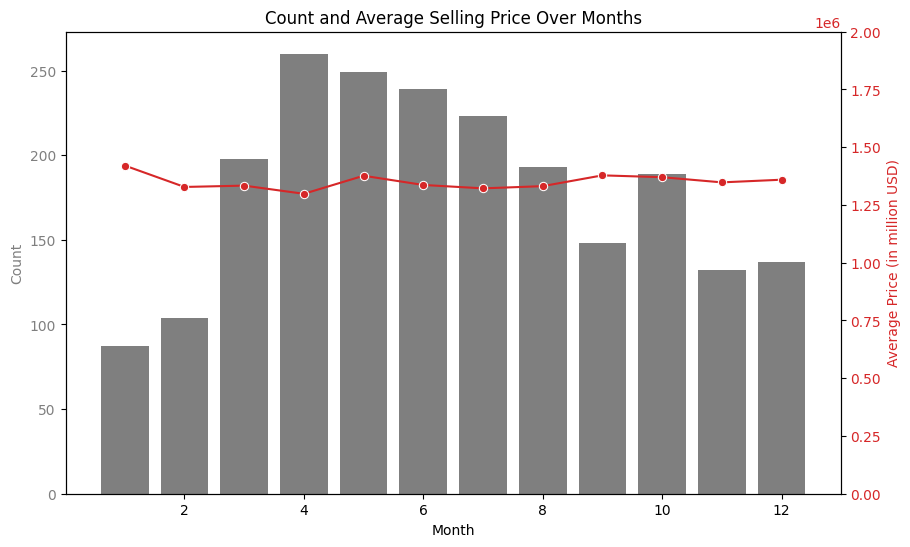

In [393]:
# Daten für die countplot
count_data = df_top_10_clean.groupby("date_sold_month").size().reset_index(name='Count')

# Daten für den lineplot
average_prices = df_top_10_clean.groupby("date_sold_month").sold_for_price.mean().reset_index(name='Average Price')

# Erstelle das Hauptdiagramm (Count)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:grey'
ax1.set_xlabel('Month')
ax1.set_ylabel('Count', color=color)
ax1.bar(count_data["date_sold_month"], count_data["Count"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Erstelle die zweite y-Achse und den Lineplot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price (in million USD)', color=color)
sns.lineplot(x="date_sold_month", y="Average Price", data=average_prices, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 2000000)

# Anzeigen
plt.xticks(rotation="vertical")
plt.title("Count and Average Selling Price Over Months")
plt.show()

We can see that the amount of houses sold peaks in spring months, namely from April to June.
Therefore, selling the house in these months will be the most beneficial.
Especially in May, the selling prices tend to be interesting, as there are higher average prices than in the other months we have shown.

#### Waterfront houses get sold mostly in spring
Check this hypothesis

In [ ]:
df_top_10_wf = df_top_10_clean.query("waterfront == 1")
df_top_10_wf.groupby("date_sold_month").sold_for_price.count().plot(kind="bar",color="grey")
plt.title("Waterfront house sales count by month")
plt.xlabel("Month")
plt.ylabel("Count")

## Analysis about outskirt houses
Through latitude and longitude determine which houses might be outskirt.
Moreover, check via zip codes, where the outskirt houses most often are located

### Hypothesis
1. The latitude that determines outskirts is below -122.000
2. The houses that are not conspicious are not in Seatlle nor in Bellevue either. --> Therefore we can determine the post-codes of these

### Find out which houses are in the outskirts.
Important: The quality of living should still be high, therefore houses with a large lot area in comparison to the living area are preferred.

In [ ]:
df_outskirts = df.query("long > -122 and sqft_lot/sqft_living >= 3")
df_outskirts

In [ ]:
fig = px.scatter_mapbox(df_outskirts, lat='lat', lon='long', zoom=7.5,hover_name="zipcode")
fig.update_layout(mapbox_style="open-street-map")

In [ ]:
df_outskirts.groupby("zipcode").zipcode.count().sort_values(ascending=True)


Berechne, wie viele Häuser im Umkreis eines ausgewählten Hauses sind:

Ein Breitengrad auf der Höhe von Seatte (47°) = 75km (75000m)

--> 750/75000 = 0.01

Ein Längengrad hat immer 111km, daher 

--> 750/111000 = 0.0067

In [ ]:
df_1 = df.copy()

# Funktion, um die Anzahl der Häuser im Bereich zu zählen
def count_nearby_houses(lat, long, data, range_lat, range_long):
    return ((data['lat'] >= lat - range_lat) & (data['lat'] <= lat + range_lat) &
            (data['long'] >= long - range_long) & (data['long'] <= long + range_long)).sum()

# Fügen Sie eine neue Spalte mit der Anzahl der Häuser im Bereich hinzu
df_1['nearby_houses_count'] = df_1.apply(lambda row: count_nearby_houses(row['lat'], row['long'], df_1, range_lat=0.01, range_long=0.0067), axis=1)

# Anzeigen des DataFrames mit der neuen Spalte
print(df_1[['lat', 'long', 'nearby_houses_count']])

Aus Google geht hervor, dass in Seattle (beim 47. Breitengrad) ein Grad circa 75 Kilometer sind.
Daher schauen wir um sehen, wie abgeschieden ein Ort ist, wie viele Häuser sich innerhalb eines Quadrats mit der Länge 1500m befinden.

In [ ]:
df_1.groupby("nearby_houses_count").nearby_houses_count.count().sort_values(ascending=True)
df_1.nearby_houses_count.describe()

In [337]:
df_outskirt_optimal = df_1.query("nearby_houses_count < 10 and grade >= 10 and long > -122.1")
df_outskirt_optimal.head()
fig = px.scatter_mapbox(df_outskirt_optimal, lat='lat', lon='long', zoom=7.5,hover_name="zipcode")
fig.update_layout(mapbox_style="open-street-map")

In [338]:
df_outskirt_optimal.shape

(103, 26)

In [ ]:
sns.barplot(x="zipcode",y="sold_for_price",data=df_outskirt_optimal)
plt.xticks(rotation = "vertical")

### Ideen für Unterkunft während des Handelns:
- Three times bigger lot than living size
- In order to be able to switch quickly, if the FBI comes close: Buy 3 houses instead of one. --> Prices < 1,000,000$
- Views = 0, damit wirklich niemand an dem Haus interessiert ist.

In [ ]:
df_select = df_outskirt_optimal.query("sqft_lot/sqft_living >= 3 and sold_for_price < 1000000 and view == 0").sort_values("grade",ascending=False)
df_select.head(10)
df_select.shape

In [ ]:
fig = px.scatter_mapbox(df_select, lat='lat', lon='long', zoom=7.5,hover_name="zipcode")
fig.update_layout(mapbox_style="open-street-map")